# KBinsDiscretizer

```python
from sklearn.preprocessing import KBinsDiscretizer
```

## About KBinsDiscretizer

`KBinsDiscretizer` adalah alat preprocessing dalam *data mining* yang mengubah fitur numerik kontinu menjadi **interval diskrit (bin)**.
Teknik ini termasuk dalam *feature engineering* dan sangat berguna untuk menangani hubungan non-linear dalam data.

### 1. Basic Concepts

- **Tujuan**: Mengonversi nilai kontinu (misal: usia, harga) menjadi kategori diskrit (misal: usia[0-20], [21-40], [41-60]).
- **Analog**: Seperti mengelompokkan nilai ujian menjadi kategori A, B, C.
- **Manfaat**:
  - Menangkap hubungan non-linear antara fitur dan target.
  - Mengurangi dampak *outliers* (data ekstrem).
  - Memenuhi asumsi model berbasis kategori (seperti Naive Bayes atau Decision Tree).

### 2. Main Parameters

Key parameter saat menggunakan `KBinsDiscretizer` (implementasi Scikit-Learn):
| Parameter  | Nilai/Opsi                                | Deskripsi                                                   |
|------------|-------------------------------------------|-------------------------------------------------------------|
| `n_bins`   | Integer (default=5)                       | Jumlah bin yang diinginkan per fitur.                       |
| `encode`   | `'onehot'`, `'onehot-dense'`, `'ordinal'` | Metode encoding hasil diskritisasi (mirip `OneHotEncoder`). |
| `strategy` | `'uniform'`, `'quantile'`, `'kmeans'`     | Strategi penentuan batas bin.                               |

### 3. Bin Determination Strategy

Strategi menentukan bagaimana batas interval dihitung:

- **`'uniform'` (Equal Width)**:
  - Membagi rentang nilai menjadi bin berlebar sama.
  - Cocok untuk data distribusi merata.
  - **Contoh**: Rentang 0–100 dengan `n_bins=5` → Bin: [0-20], [20-40], ..., [80-100].

- **`'quantile'` (Equal Frequency)**:
  - Setiap bin berisi jumlah data yang sama (±).
  - Cocok untuk data *skewed* atau outlier.
  - **Contoh**: 100 data, `n_bins=5` → Setiap bin berisi ~20 data.

- **`'kmeans'` (Clustering-based)**:
  - Gunakan algoritma K-Means untuk mengelompokkan nilai.
  - Batas bin ditentukan oleh pusat kluster.
  - Cocok untuk pola distribusi kompleks.

### 4. Encoding Method

Setelah diskritisasi, hasil perlu di-encode untuk model ML:
- **`'ordinal'`**:
  - Hasil: Integer (0, 1, 2, ...) yang mewakili bin.
  - Contoh: Nilai 15 → Bin 0, Nilai 25 → Bin 1.
- **`'onehot'`**:
  - Hasil: Matriks *sparse* one-hot (misal: [0, 1, 0] untuk Bin 1).
- **`'onehot-dense'`**:
  - Versi *dense* dari one-hot (bentuk array penuh).

### 5. Usage Procedure

```python
from sklearn.preprocessing import KBinsDiscretizer

# Inisialisasi
discretizer = KBinsDiscretizer(
    n_bins=3,
    encode='ordinal',
    strategy='kmeans'
)

# Fitting & transform
X_binned = discretizer.fit_transform(X)
```

### 6. Applications & Best Practices

- **Use Case**:
  - Meningkatkan performa model linear (seperti Logistic Regression) dengan menambahkan non-linearitas.
  - Reduksi noise pada data sensor.
- **Peringatan**:
  - `n_bins` terlalu besar → Overfitting.
  - `n_bins` terlalu kecil → Kehilangan informasi.
- **Tips**:
  - Gunakan `strategy='quantile'` untuk data tidak seimbang.
  - Validasi dengan cross-validation untuk memilih `n_bins` optimal.
  - Kombinasikan dengan `Pipeline` untuk menghindari *data leakage*.

## Assignment To-Do

Menjelaskan proses Discretization menggunakan K-Means Clustering pada data iris,
dan lakukan dengan model Naive Bayes dan Decision Tree on data that has been Discretized and before Discretization.

### 1. Data Preparation

Pastikan pembagian data *random* untuk menghindari bias.
- Pilih dataset Iris (4 fitur numerik: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`; target: spesies bunga).
- Bagi data menjadi training set & testing set (contoh: 70% training, 30% testing).

### 2. Discretization with K-Means

Inisialisasi `KBinsDiscretizer`:
- Parameter:
  - `strategy='kmeans'` (gunakan K-Means untuk menentukan bin).
  - `n_bins` (misal 3-5 bin per fitur, eksperimen nanti).
  - `encode='ordinal'` (hasil: angka integer mewakili bin).
- Fitting:
  - Hitung pusat kluster (centroid) untuk setiap fitur menggunakan algoritma K-Means pada training set.
  - Contoh: Fitur `petal_length` → centroid bin 1 = 1.5 cm, bin 2 = 4.0 cm, bin 3 = 5.5 cm.
- Transform:
  - Kategorikan nilai kontinu ke bin berdasarkan jarak terdekat ke centroid.
  - Contoh: `petal_length` = 4.2 cm → masuk bin 2 (karena lebih dekat ke 4.0 cm).
  - Bin tidak sama lebar, tetapi mengikuti pola alami data.
  - Hasil akhir: Setiap fitur numerik menjadi variabel kategorikal ordinal (contoh: `petal_length` → [0, 1, 2]).

### 3. Modeling *Before Discretization*

Baseline performa tanpa proses discretization

Naive Bayes (GaussianNB):
   - Asumsi: Data kontinu berdistribusi normal.
   - Latih model pada data asli (4 fitur numerik).
   - Evaluasi akurasi di testing set.

Decision Tree:
   - Latih model pada data asli (split node berdasarkan nilai kontinu).
   - Evaluasi akurasi di testing set.

### 4. Modeling *After Discretization*

Model Naive Bayes harus diubah dari GaussianNB ke `CategoricalNB` karena tipe data berubah!

Naive Bayes (CategoricalNB):
   - Ubah tipe model: Gunakan CategoricalNB (dirancang untuk fitur diskret/kategorikal).
   - Latih model pada data hasil discretization.
   - Evaluasi akurasi di testing set.

Decision Tree:
   - Latih model yang sama pada data diskret.
   - Splitting criterion (misal: Gini/Entropy) bekerja pada frekuensi kategori.
   - Evaluasi akurasi di testing set.

### 5. Evaluation & Comparison

  1. Hitung metrik performa:
     - Akurasi, Precision, Recall (fokus pada akurasi untuk simplifikasi).
  2. Bandingkan hasil:
     - Naive Bayes: Before vs. After discretization.  
     - Decision Tree: Before vs. After discretization.  
  3. Analisis:  
     - Apakah discretization meningkatkan akurasi?  
     - Model mana yang paling diuntungkan?  
     - Mengapa bisa terjadi (lihat karakteristik model)?   
  - Naive Bayes:  
    - Before: Asumsi normal mungkin tidak terpenuhi.  
    - After: Data diskret lebih sesuai dengan multinomial distribution.  
  - Decision Tree:  
    - Before: Split pada nilai kontinu (misal: `petal_length < 2.45`).  
    - After: Split berdasarkan kategori bin (misal: `petal_length_bin == 1`).  

## Data Mining Process (`CRISP-DM`)

### 1. Business Understanding

- **Tujuan Utama**:
  - Mengevaluasi pengaruh diskritisasi berbasis K-Means terhadap performa model klasifikasi (Naive Bayes & Decision Tree).
  - Menentukan apakah transformasi data diskrit meningkatkan akurasi prediksi spesies bunga iris.
- **Kriteria Kesuksesan**:
  - Akurasi model setelah diskritisasi > akurasi model baseline (data kontinu).

#### 1.1 Define the Problem

*"Bagaimana pengaruh teknik diskritisasi berbasis K-Means terhadap akurasi klasifikasi spesies bunga Iris menggunakan model Naive Bayes dan Decision Tree?"*

#### 1.2 Objectives

1. Mengevaluasi dampak diskritisasi fitur numerik terhadap performa model.
2. Membandingkan akurasi model pada data kontinu vs. diskret.
3. Menentukan apakah diskritisasi K-Means cocok untuk dataset Iris.

#### 1.3 Stakeholders & Needs

| Stakeholder        | Ekspektasi                                                         |
|--------------------|--------------------------------------------------------------------|
| **Data Scientist** | Memahami kondisi dimana diskritisasi meningkatkan performa model.  |
| **Dosen**          | Validasi pemahaman konsep preprocessing dan pemodelan.             |
| **Peneliti Botani**| Metode akurat untuk identifikasi spesies berbasis fitur morfologi. |

#### 1.4 Success Criteria

- **Technical**:
  - Akurasi model setelah diskritisasi meningkat ≥ 3% dibanding baseline (data kontinu).
- **Business**:
  - Rekomendasi praktis: "Gunakan diskritisasi jika pakai Naive Bayes, pertahankan data kontinu untuk Decision Tree".

### 2. Data Understanding

- **Aktivitas**:
  - Eksplorasi dataset Iris:
    - Jumlah fitur (4 numerik: sepal/petal length/width).
    - Jumlah kelas target (3 spesies: setosa, versicolor, virginica).
    - Distribusi data (statistik deskriptif, deteksi outlier).
  - Visualisasi:
    - Scatter plot antar-fiturnya.
    - Histogram distribusi tiap fitur.
- **Tools**:
  - Pandas profiling, Matplotlib/Seaborn.

In [845]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

#### 2.1. Data Collection

- Memuat data dari kedua sumber (MySQL dan PostgreSQL)
- Mengecek struktur dasar: dimensi data dan sampel awal
- **CRISP-DM Compliance**: Memvalidasi sumber data dan format

In [846]:
df_mysql = pd.read_csv("data/iris_mysql.csv")

print("MySQL Dataset:")
display(df_mysql.head())
# df_mysql.info()

MySQL Dataset:


,id,Class,petal length,petal width
0,1,Iris-setosa,1.4,0.2
1,2,Iris-setosa,1.4,0.2
2,3,Iris-setosa,1.3,0.2
3,4,Iris-setosa,1.5,0.2
4,5,Iris-setosa,1.4,0.2


In [847]:
df_postgre = pd.read_csv("data/iris-postgre.csv")

print("PostgreSQL Dataset:")
display(df_postgre.head())
# df_postgre.info()

PostgreSQL Dataset:


,id,Class,sepal length,sepal width
0,1,Iris-setosa,5.1,3.5
1,2,Iris-setosa,4.9,3.0
2,3,Iris-setosa,4.7,3.2
3,4,Iris-setosa,4.6,3.1
4,5,Iris-setosa,5.0,3.6


#### 2.2. Data Description

- Statistik deskriptif lengkap: mean, std, min/max, IQR
- **CRISP-DM Compliance**: Menggunakan `describe()` untuk summary statistik

In [848]:
def descriptive_analysis(df, max_cat_display=10):
    # 1. Analisis Kolom Numerik
    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols) > 0:
        # Hitung statistik tambahan
        num_stats = df[num_cols].describe().T.assign(
            IQR = lambda x: x['75%'] - x['25%'],
            CV = lambda x: np.where(x['mean'] != 0, x['std'] / x['mean'], np.nan)
        )

        # Highlight kolom dengan CV tinggi (>0.5) dan missing values
        cv_highlight = num_stats['CV'] > 0.5
        display(num_stats.style
                .background_gradient(cmap='Blues', subset=['mean', 'std', '50%'])
                .applymap(lambda _: 'background-color: #ffff', subset=pd.IndexSlice[cv_highlight, ['CV']])
                .set_caption(f"Statistik Numerik ({len(num_cols)} fitur)"))
    else:
        print("Tidak ditemukan kolom numerik")

    # 2. Analisis Kolom Kategorikal
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:

        for col in cat_cols:
            # Hitung distribusi dan proporsi
            counts = df[col].value_counts(dropna=False)
            proportions = counts / len(df)
            cat_df = pd.DataFrame({
                'Count': counts, 
                'Proportion': proportions
            }).head(max_cat_display)
            
            # Tampilkan dengan styling
            display(cat_df.style
                    .bar(subset=['Count'], color='#0000', vmin=0)
                    .format({'Proportion': '{:.2%}'})
                    .set_caption(f"Variabel: {col} (Unique: {df[col].nunique()})"))
    else:
        print("Tidak ditemukan kolom kategorikal")

In [849]:
descriptive_analysis(df_mysql)

,count,mean,std,min,25%,50%,75%,max,IQR,CV
id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000,74.500000,0.575435
petal length,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000,3.500000,0.469427
petal width,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000,1.500000,0.636675


,Count,Proportion
Class,,
Iris-setosa,50,33.33%
Iris-versicolor,50,33.33%
Iris-virginica,50,33.33%


In [850]:
descriptive_analysis(df_postgre, max_cat_display=5)

,count,mean,std,min,25%,50%,75%,max,IQR,CV
id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000,74.500000,0.575435
sepal length,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000,1.300000,0.141711
sepal width,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000,0.500000,0.141976


,Count,Proportion
Class,,
Iris-setosa,50,33.33%
Iris-versicolor,50,33.33%
Iris-virginica,50,33.33%


#### 2.3. Data Exploration

1. **Distribusi Fitur**:
   - Histogram + KDE untuk melihat bentuk distribusi
   - Garis mean/median untuk identifikasi skewness
2. **Outlier Detection**:
   - Boxplot visual untuk identifikasi titik ekstrem
3. **Hubungan Antar Fitur**:
   - Pairplot dengan coloring berdasarkan spesies
   - Heatmap korelasi numerik
4. **Analisis Multivariat**:
   - Scatter matrix untuk interaksi fitur

In [851]:
def plot_distributions(df, dataset_name):
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    n_cols = min(3, len(num_cols))
    n_rows = int(np.ceil(len(num_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))

    if isinstance(axes, np.ndarray):
        axes_flat = axes.flatten()
    else:
        axes_flat = [axes]  # Untuk kasus single subplot

    for i, col in enumerate(num_cols):
        ax = axes_flat[i]
        sns.histplot(df[col], kde=True, ax=ax, color='skyblue', stat='density', alpha=0.7)
        mean_val = df[col].mean()
        median_val = df[col].median()
        mode_val = df[col].mode()[0] if not df[col].mode().empty else mean_val
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
        ax.axvline(mode_val, color='purple', linestyle=':', linewidth=2, label=f'Mode: {mode_val:.2f}')

        if mean_val > median_val:
            ax.axvspan(median_val, mean_val, color='red', alpha=0.1)
        elif mean_val < median_val:
            ax.axvspan(mean_val, median_val, color='blue', alpha=0.1)
        ax.set_title(f'Distribusi {col}\n(Skew: {df[col].skew():.2f}, Kurtosis: {df[col].kurtosis():.2f})')
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.3)

    for j in range(i+1, len(axes_flat)):
        axes_flat[j].axis('off')
    plt.tight_layout()
    plt.savefig(f"data/tugas8/assets/distributions_{dataset_name}.png", dpi=100, bbox_inches='tight')
    plt.show()

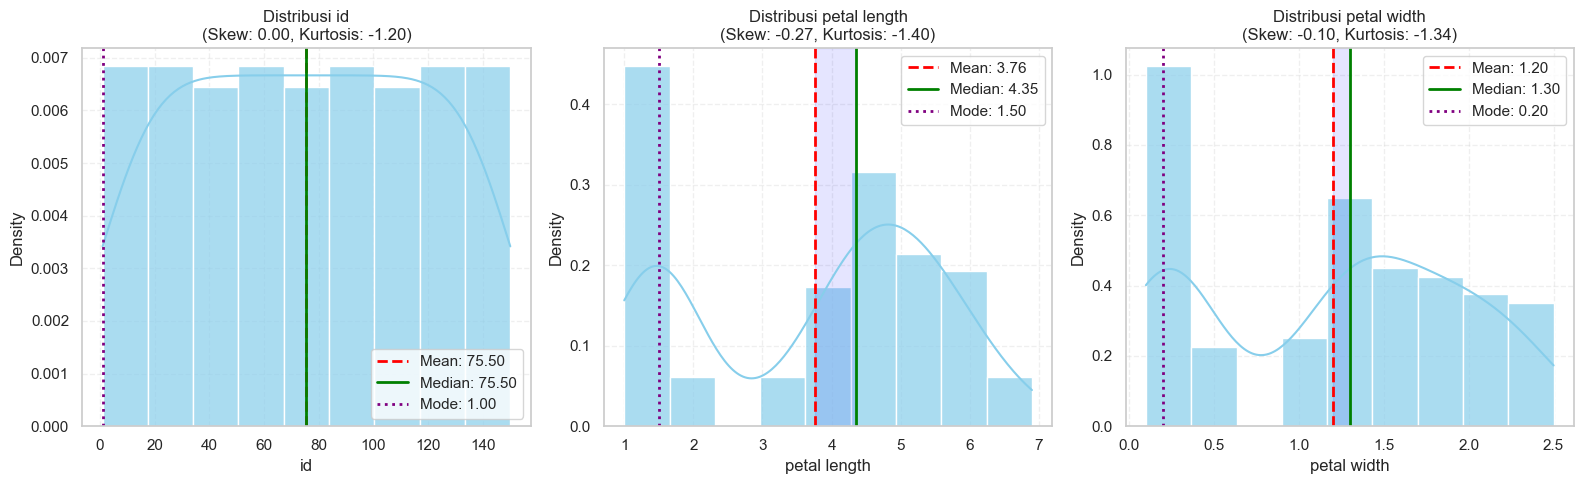

In [852]:
plot_distributions(df_mysql, "MySQL")

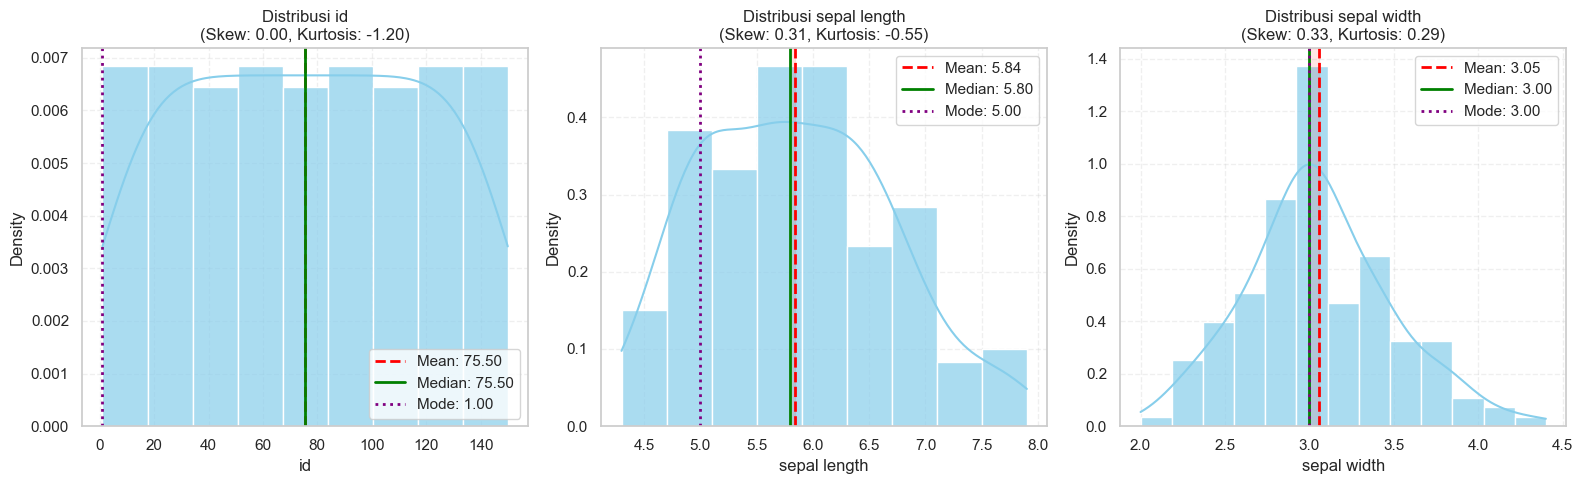

In [853]:
plot_distributions(df_postgre, "PostgreSQL")

In [854]:
def analyze_target(df, name, target_col='Class'):
    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(14, 6))

    g = sns.pairplot(df, hue=target_col, diag_kind='kde', markers='o', 
                     plot_kws={'s': 25, 'alpha': 0.8, 'edgecolor': 'k'},
                     diag_kws={'fill': True, 'alpha': 0.7})
    g.fig.suptitle(f'Hubungan Fitur per Kelas ({name})', y=1.02)
    g.savefig(f"data/tugas8/assets/pairplot_{name}.png", dpi=100, bbox_inches='tight')
    plt.show()

<Figure size 1400x600 with 0 Axes>

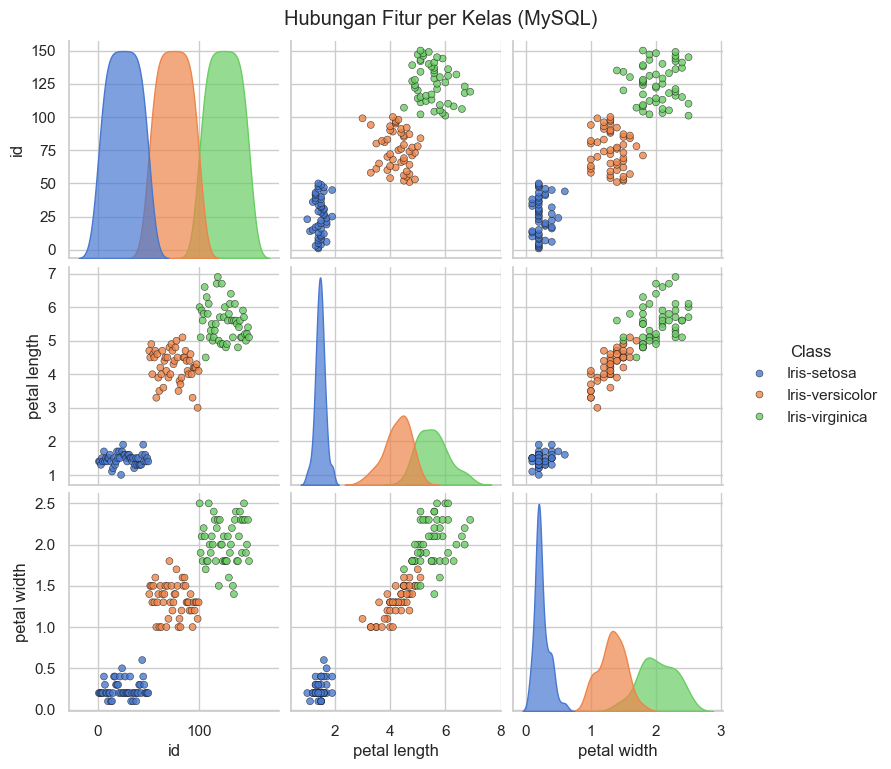

In [855]:
analyze_target(df_mysql, "MySQL")

<Figure size 1400x600 with 0 Axes>

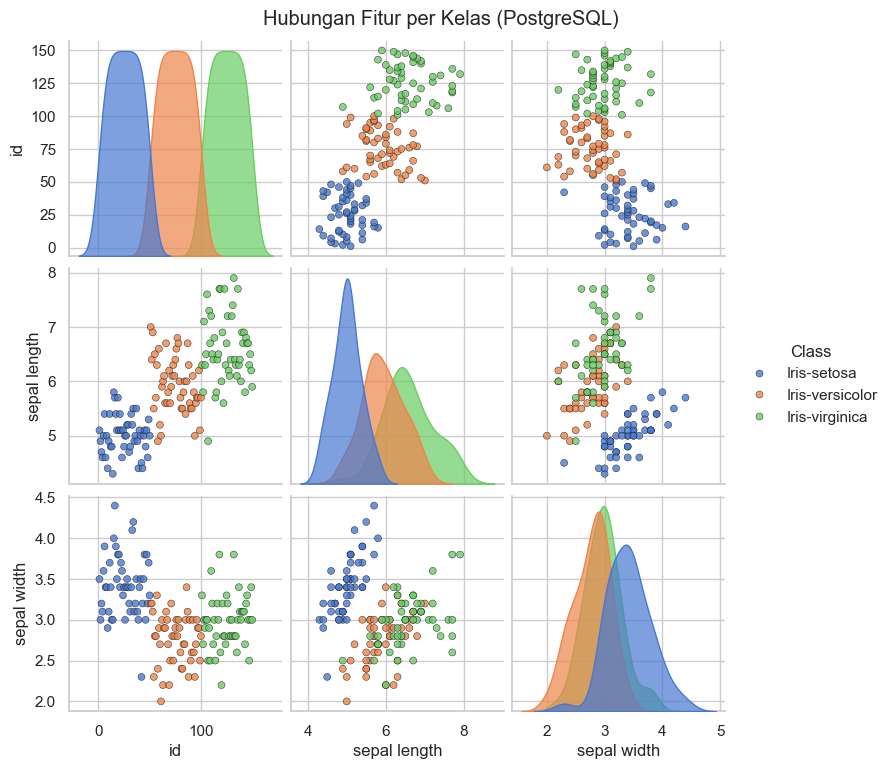

In [856]:
analyze_target(df_postgre, "PostgreSQL", target_col="Class")

#### 2.4. Verify Data Quality

1. **Missing Values**:
   - Kuantifikasi nilai hilang per fitur
2. **Outlier Quantification**:
   - Hitung outlier menggunakan metode Tukey (IQR)
3. **Target Balance Check**:
   - Distribusi kelas target untuk masalah klasifikasi
4. **Data Consistency**:
   - Cek duplikat dan nilai negatif yang tidak valid

In [857]:
def data_quality_check(df, name):
    print(f"Analisis Kualitas Data ({name}):")

    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_pct
    }).query('`Missing Values` > 0')

    if missing_df.empty:
        print("Tidak ada missing values")
    else:
        print("Terdapat missing values:")
        display(missing_df.style.background_gradient(cmap='Reds'))

    print("\nDeteksi Outlier (Metode IQR):")
    outlier_report = []
    num_cols = df.select_dtypes(include=np.number).columns
    
    for col in num_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_pct = (len(outliers) / len(df)) * 100

        outlier_report.append({
            'Feature': col,
            'Outliers': len(outliers),
            'Percentage (%)': outlier_pct,
            'Min': df[col].min(),
            'Max': df[col].max()
        })

    display(pd.DataFrame(outlier_report).style.background_gradient(subset=['Outliers'], cmap='Oranges'))

    neg_check = df[num_cols].lt(0).any()
    if neg_check.any():
        print("\nTerdapat nilai negatif tidak valid")
        display(neg_check.to_frame(name='Has Negative?').query('`Has Negative?` == True'))
    else:
        print("Tidak ada nilai negatif tidak valid")

In [858]:
data_quality_check(df_mysql, "MySQL")

Analisis Kualitas Data (MySQL):
Tidak ada missing values

Deteksi Outlier (Metode IQR):


,Feature,Outliers,Percentage (%),Min,Max
0,id,0,0.000000,1.000000,150.000000
1,petal length,0,0.000000,1.000000,6.900000
2,petal width,0,0.000000,0.100000,2.500000


Tidak ada nilai negatif tidak valid


In [859]:
data_quality_check(df_postgre, "PostgreSQL")

Analisis Kualitas Data (PostgreSQL):
Tidak ada missing values

Deteksi Outlier (Metode IQR):


,Feature,Outliers,Percentage (%),Min,Max
0,id,0,0.000000,1.000000,150.000000
1,sepal length,0,0.000000,4.300000,7.900000
2,sepal width,4,2.666667,2.000000,4.400000


Tidak ada nilai negatif tidak valid


In [860]:
def analyze_structure(df, name):
    print(f"Struktur Data ({name}):")
    print(f"- Dimensi: {df.shape[0]} baris, {df.shape[1]} kolom")
    print(f"- Kolom: {list(df.columns)}")

    dtype_counts = df.dtypes.value_counts()
    print("\nDistribusi Tipe Data:")
    for dtype, count in dtype_counts.items():
        print(f"{dtype}: {count} kolom")

    print("\nNilai Unik di Kolom Kategorikal:")
    for col in df.select_dtypes(include='object'):
        unique_vals = df[col].unique()
        print(f"{col}: {len(unique_vals)} nilai unik → {unique_vals[:3]}...")

    dupes = df.duplicated().sum()
    print(f"\nDuplikat: {dupes} baris ({dupes/len(df):.1%})")

In [861]:
analyze_structure(df_mysql, "MySQL")

Struktur Data (MySQL):
- Dimensi: 150 baris, 4 kolom
- Kolom: ['id', 'Class', 'petal length', 'petal width']

Distribusi Tipe Data:
float64: 2 kolom
int64: 1 kolom
object: 1 kolom

Nilai Unik di Kolom Kategorikal:
Class: 3 nilai unik → ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']...

Duplikat: 0 baris (0.0%)


In [862]:
analyze_structure(df_postgre, "PostgreSQL")

Struktur Data (PostgreSQL):
- Dimensi: 150 baris, 4 kolom
- Kolom: ['id', 'Class', 'sepal length', 'sepal width']

Distribusi Tipe Data:
float64: 2 kolom
int64: 1 kolom
object: 1 kolom

Nilai Unik di Kolom Kategorikal:
Class: 3 nilai unik → ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']...

Duplikat: 0 baris (0.0%)


#### Pandas Profiling

In [863]:
def pandas_profiling_report(df, name):
    print(f"\nMembuat Pandas Profiling Report untuk {name}...")

    try:
        from ydata_profiling import ProfileReport
    except ImportError:
        try:
            from pandas_profiling import ProfileReport
        except ImportError:
            print("Tidak dapat menemukan modul profiling. Silakan instal dengan:")
            print("!pip install ydata-profiling")
            return None

    profile = ProfileReport(df, title=f"Profiling Report - {name}")

    filename = f"data/tugas8/html/report_{name.lower().replace(' ', '_')}.html"
    profile.to_file(filename)

    from IPython.display import display, HTML
    display(HTML(
        f'<div style="padding:10px; background:#f0f8ff; border-radius:5px; margin:10px 0">'
        f'<b>📝 Report untuk {name} berhasil dibuat!</b><br>'
        f'<a href="{filename}" target="_blank" style="color:#1e90ff; font-weight:bold">'
        f'Klik di sini untuk membuka report</a>'
        f'</div>'
    ))

    return profile

In [864]:
mysql_report = pandas_profiling_report(df_mysql, "MySQL Dataset")


Membuat Pandas Profiling Report untuk MySQL Dataset...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [865]:
postgre_report = pandas_profiling_report(df_postgre, "PostgreSQL Dataset")


Membuat Pandas Profiling Report untuk PostgreSQL Dataset...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 362.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3. Data Preparation

- **Split data**: Training set (70%) vs Testing set (30%).
- **Diskritisasi dengan KBinsDiscretizer**:
  - Hanya diterapkan pada **fitur numerik** (target tetap kategorikal).
  - Parameter: `strategy='kmeans'`, `n_bins=3`, `encode='ordinal'`.
  - **Hanya fitting pada training set** (untuk hindari data leakage).
- **Output**:
  - Versi data kontinu (asli).
  - Versi data diskret (hasil transformasi).

#### 3.1. Data Integration

In [866]:
mysql_cols = df_mysql.columns.tolist()
postgre_cols = df_postgre.columns.tolist()

print("Kolom di MySQL:", mysql_cols)
print("Kolom di PostgreSQL:", postgre_cols)

Kolom di MySQL: ['id', 'Class', 'petal length', 'petal width']
Kolom di PostgreSQL: ['id', 'Class', 'sepal length', 'sepal width']


In [867]:
print("Verifikasi ID:")
print(f"ID unik di MySQL: {df_mysql['id'].nunique()}, total baris: {len(df_mysql)}")
print(f"ID unik di PostgreSQL: {df_postgre['id'].nunique()}, total baris: {len(df_postgre)}")

Verifikasi ID:
ID unik di MySQL: 150, total baris: 150
ID unik di PostgreSQL: 150, total baris: 150


In [868]:
df_combined = pd.merge(
    df_mysql,
    df_postgre,
    how='inner',
    on='id',
    suffixes=('_mysql', '_postgre'),
    validate='one_to_one',         # Make sure there's no duplicated ID
)

print("Verifikasi kelas:")
print("Nilai kelas MySQL:", df_combined['Class_mysql'].unique())
print("Nilai kelas PostgreSQL:", df_combined['Class_postgre'].unique())

Verifikasi kelas:
Nilai kelas MySQL: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Nilai kelas PostgreSQL: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [869]:
# Gunakan kelas dari MySQL sebagai acuan
df_combined['Class'] = df_combined['Class_mysql']

rename_dict = {
    'petal length': 'petal_length',
    'petal width': 'petal_width',
    'sepal length': 'sepal_length',
    'sepal width': 'sepal_width'
}
df_combined = df_combined.rename(columns=rename_dict)

final_columns = [
    'id', 'sepal_length', 'sepal_width', 
    'petal_length', 'petal_width', 'Class'
]
df_combined = df_combined[final_columns]

In [870]:
print("Cleaning dasar:")
print("Baris duplikat:", df_combined.duplicated().sum())
df_combined = df_combined.drop_duplicates()
df_combined = df_combined.dropna(subset=final_columns, how='all')

Cleaning dasar:
Baris duplikat: 0


In [871]:
df_combined.to_csv("data/tugas8/iris_combined.csv", index=False)

print("Membuat Profiling untuk Dataset Gabungan...")
combined_report = pandas_profiling_report(df_combined, "Combined Iris Dataset")

Membuat Profiling untuk Dataset Gabungan...

Membuat Pandas Profiling Report untuk Combined Iris Dataset...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 214.20it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### 3.2. Data Cleaning

- Cek dan tangani missing values
- Identifikasi dan hapus duplikat
- Deteksi nilai tidak valid

In [872]:
df_combined = pd.read_csv("data/tugas8/iris_combined.csv")
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   Class         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [873]:
missing_values = df_combined.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Class           0
dtype: int64


In [874]:
duplicates = df_combined.duplicated().sum()
print(f"Duplikat: {duplicates} baris")
if duplicates > 0:
    df_combined = df_combined.drop_duplicates()
    print(f"✅ {duplicates} duplikat dihapus")

Duplikat: 0 baris


In [875]:
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
negative_check = df_combined[numerical_cols].lt(0).any().any()
print(f"Nilai negatif: {'Ya' if negative_check else 'Tidak ditemukan'}")

Nilai negatif: Tidak ditemukan


In [876]:
df_combined.to_csv("data/tugas8/iris_cleaned.csv", index=False)

#### 3.3. Data Transformation

- Pisahkan fitur numerik dan target
- Bagi data menjadi training set (70%) dan testing set (30%)
- Terapkan KBinsDiscretizer dengan strategi k-means hanya pada training set

In [877]:
df_cleaned = pd.read_csv("data/tugas8/iris_cleaned.csv")
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   Class         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


##### Data Splitting

In [878]:
from sklearn.model_selection import train_test_split

numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Pisahkan fitur (X) dan target (y)
X = df_cleaned[numerical_cols]
y = df_cleaned['Class']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Hasil Data Splitting:")
print(f"- Training set: {X_train.shape[0]} sampel")
print(f"- Testing set: {X_test.shape[0]} sampel")
print(f"- Distribusi kelas training:\n{y_train.value_counts(normalize=True)}")

Hasil Data Splitting:
- Training set: 105 sampel
- Testing set: 45 sampel
- Distribusi kelas training:
Class
Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64


In [879]:
print("Verifikasi hasil splitting:")
print("Index X_train:", X_train.index[:5])
print("Index y_train:", y_train.index[:5])

Verifikasi hasil splitting:
Index X_train: Index([98, 68, 19, 143, 99], dtype='int64')
Index y_train: Index([98, 68, 19, 143, 99], dtype='int64')


In [880]:
if X_train.index.equals(y_train.index):
    print("✅ Index training set sesuai")
else:
    print("❌ Ada ketidaksesuaian index training!")
    print("Perbedaan index:", X_train.index.difference(y_train.index))

if X_test.index.equals(y_test.index):
    print("✅ Index testing set sesuai")
else:
    print("❌ Ada ketidaksesuaian index testing!")
    print("Perbedaan index:", X_test.index.difference(y_test.index))

✅ Index training set sesuai
✅ Index testing set sesuai


In [881]:
print("Nilai NaN:")
print("Training set - X:", X_train.isnull().sum().sum())
print("Training set - y:", y_train.isnull().sum())
print("Testing set - X:", X_test.isnull().sum().sum())
print("Testing set - y:", y_test.isnull().sum())

Nilai NaN:
Training set - X: 0
Training set - y: 0
Testing set - X: 0
Testing set - y: 0


In [882]:
print(f"Distribusi kelas training:\n{y_train.value_counts(normalize=True)}")

Distribusi kelas training:
Class
Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64


In [883]:
df_combined.to_csv("data/tugas8/iris_integrated.csv", index=False)

##### `Discretization`

In [884]:
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer

In [885]:
# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi ke DataFrame dengan index asli
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

In [886]:
# 1. Inisialisasi discretizer
discretizer = KBinsDiscretizer(
    n_bins=3,
    encode='ordinal',
    strategy='kmeans'
)

# 2. Fitting hanya pada training set
discretizer.fit(X_train)

# 3. Transform training dan testing set
X_train_disc = discretizer.transform(X_train)
X_test_disc = discretizer.transform(X_test)

# 4. Konversi ke DataFrame dengan penanganan index
disc_columns = [f"{col}_disc" for col in numerical_cols]

# Pertahankan index asli untuk memastikan alignment
X_train_disc_df = pd.DataFrame(X_train_disc, columns=disc_columns, index=X_train.index)
X_test_disc_df = pd.DataFrame(X_test_disc, columns=disc_columns, index=X_test.index)

print("Hasil Diskritisasi:")
print("Sample data training setelah diskritisasi:")
display(X_train_disc_df.head())

Hasil Diskritisasi:
Sample data training setelah diskritisasi:


,sepal_length_disc,sepal_width_disc,petal_length_disc,petal_width_disc
98,0.0,0.0,1.0,1.0
68,1.0,0.0,1.0,1.0
19,0.0,2.0,0.0,0.0
143,2.0,1.0,2.0,2.0
99,1.0,0.0,1.0,1.0


##### Bin Limit Visualization

Batas Bin (K-Means Clustering):
- sepal_length:
  Bin 0: [4.30 - 5.52)
  Bin 1: [5.52 - 6.57)
  Bin 2: [6.57 - 7.90]


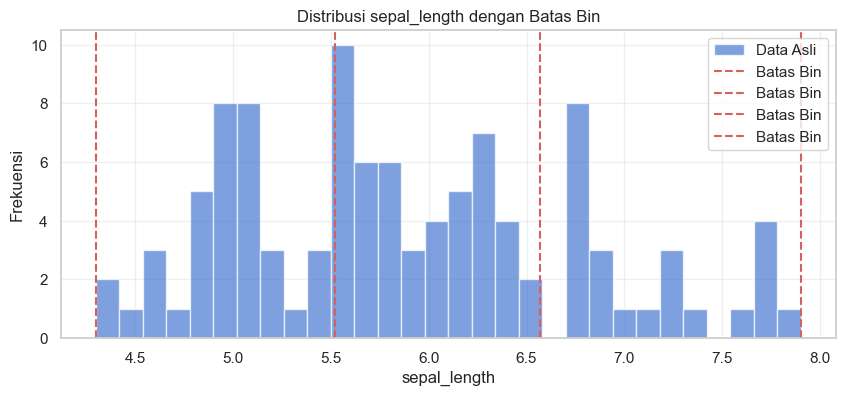

- sepal_width:
  Bin 0: [2.00 - 2.87)
  Bin 1: [2.87 - 3.50)
  Bin 2: [3.50 - 4.40]


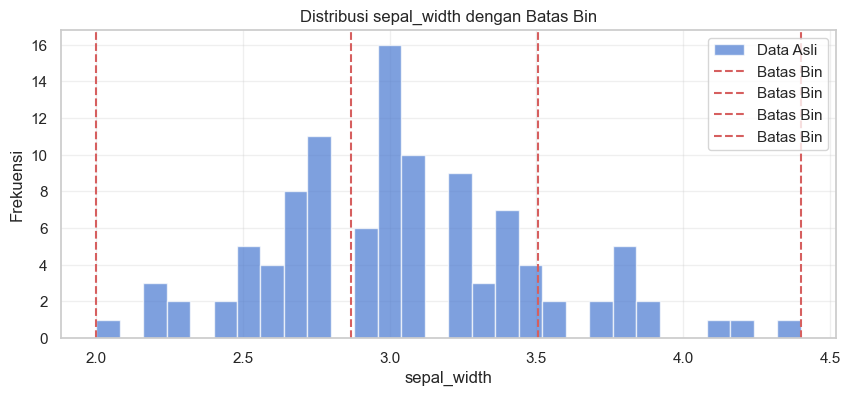

- petal_length:
  Bin 0: [1.10 - 2.88)
  Bin 1: [2.88 - 4.97)
  Bin 2: [4.97 - 6.90]


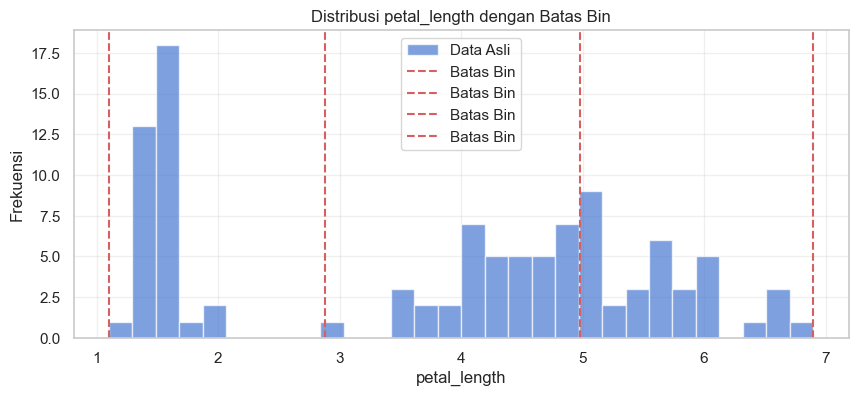

- petal_width:
  Bin 0: [0.10 - 0.77)
  Bin 1: [0.77 - 1.70)
  Bin 2: [1.70 - 2.50]


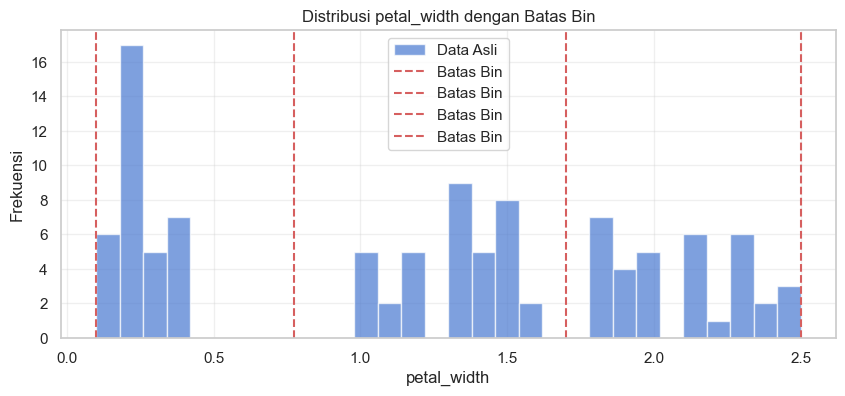

In [887]:
print("Batas Bin (K-Means Clustering):")
for i, col in enumerate(numerical_cols):
    bin_edges = discretizer.bin_edges_[i]
    print(f"- {col}:")
    print(f"  Bin 0: [{bin_edges[0]:.2f} - {bin_edges[1]:.2f})")
    print(f"  Bin 1: [{bin_edges[1]:.2f} - {bin_edges[2]:.2f})")
    print(f"  Bin 2: [{bin_edges[2]:.2f} - {bin_edges[3]:.2f}]")
    plt.figure(figsize=(10, 4))
    plt.hist(X_train[col], bins=30, alpha=0.7, label='Data Asli')
    for edge in bin_edges:
        plt.axvline(edge, color='r', linestyle='--', label='Batas Bin')
    plt.title(f'Distribusi {col} dengan Batas Bin')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.savefig(f"data/tugas8/assets/bin_edges_{col}.png", dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()

##### Save result

In [888]:
train_original = pd.concat([X_train, y_train], axis=1)
test_original = pd.concat([X_test, y_test], axis=1)
train_scaled = pd.concat([X_train_scaled_df, y_train], axis=1)
test_scaled = pd.concat([X_test_scaled_df, y_test], axis=1)
train_discretized = pd.concat([X_train_disc_df, y_train], axis=1)
test_discretized = pd.concat([X_test_disc_df, y_test], axis=1)

def verify_dataset(df, name):
    print(f"Verifikasi {name}:")
    print(f"- Dimensi: {df.shape}")
    print(f"- Nilai NaN: {df.isnull().sum().sum()}")
    print(f"- Baris duplikat: {df.duplicated().sum()}")
    if not df.index.is_unique:
        print("⚠️ Peringatan: Index tidak unik!")
        df = df.reset_index(drop=True)
    return df

In [889]:
train_original = verify_dataset(train_original, "Train Original")
test_original = verify_dataset(test_original, "Test Original")

Verifikasi Train Original:
- Dimensi: (105, 5)
- Nilai NaN: 0
- Baris duplikat: 3
Verifikasi Test Original:
- Dimensi: (45, 5)
- Nilai NaN: 0
- Baris duplikat: 0


In [890]:
train_scaled = verify_dataset(train_scaled, "Train Scaled")
test_scaled = verify_dataset(test_scaled, "Test Scaled")

Verifikasi Train Scaled:
- Dimensi: (105, 5)
- Nilai NaN: 0
- Baris duplikat: 3
Verifikasi Test Scaled:
- Dimensi: (45, 5)
- Nilai NaN: 0
- Baris duplikat: 0


In [891]:
train_discretized = verify_dataset(train_discretized, "Train Discretized")
test_discretized = verify_dataset(test_discretized, "Test Discretized")

Verifikasi Train Discretized:
- Dimensi: (105, 5)
- Nilai NaN: 0
- Baris duplikat: 86
Verifikasi Test Discretized:
- Dimensi: (45, 5)
- Nilai NaN: 0
- Baris duplikat: 29


In [892]:
# Simpan dataset
save_path = "data/tugas8/models/"
train_original.to_csv(save_path + "train_original.csv", index=False)
test_original.to_csv(save_path + "test_original.csv", index=False)
train_scaled.to_csv(save_path + "train_scaled.csv", index=False)
test_scaled.to_csv(save_path + "test_scaled.csv", index=False)
train_discretized.to_csv(save_path + "train_discretized.csv", index=False)
test_discretized.to_csv(save_path + "test_discretized.csv", index=False)

print("Dataset Disimpan:")
print(f"- {save_path}train_original.csv")
print(f"- {save_path}test_original.csv")
print(f"- {save_path}train_discretized.csv")
print(f"- {save_path}test_discretized.csv")

Dataset Disimpan:
- data/tugas8/models/train_original.csv
- data/tugas8/models/test_original.csv
- data/tugas8/models/train_discretized.csv
- data/tugas8/models/test_discretized.csv


In [893]:
print("Verifikasi Penyimpanan:")
for file in [
    "train_original.csv", "test_original.csv",
    "train_scaled.csv", "test_scaled.csv",
    "train_discretized.csv", "test_discretized.csv"
]:
    try:
        df_check = pd.read_csv(save_path + file)
        print(f"- {file}: {len(df_check)} baris, {df_check.isnull().sum().sum()} NaN")
    except FileNotFoundError:
        print(f"File {file} tidak ditemukan!")

Verifikasi Penyimpanan:
- train_original.csv: 105 baris, 0 NaN
- test_original.csv: 45 baris, 0 NaN
- train_scaled.csv: 105 baris, 0 NaN
- test_scaled.csv: 45 baris, 0 NaN
- train_discretized.csv: 105 baris, 0 NaN
- test_discretized.csv: 45 baris, 0 NaN


#### 3.4. Data Reduction (Opsional)

- Tidak diperlukan karena:
  - Dataset kecil (150 sampel)
  - Semua fitur relevan untuk klasifikasi
  - Tidak ada fitur redundan

### 4. Modeling

- **Algoritma**:
  | Data Type   | Naive Bayes   | Decision Tree          |
  |-------------|---------------|------------------------|
  | **Kontinu** | GaussianNB    | DecisionTreeClassifier |
  | **Diskret** | CategoricalNB | DecisionTreeClassifier |
- **Prosedur**:
  - Latih **4 model berbeda**:
    1. GaussianNB pada data kontinu.
    2. Decision Tree pada data kontinu.
    3. CategoricalNB pada data diskret.
    4. Decision Tree pada data diskret.
  - Gunakan **hyperparameter default** (untuk fokus pada efek diskritisasi).

#### 4.1. Modeling Techniques

In [894]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV

# 1. Inisialisasi model
models = {
    "GaussianNB (Original)": GaussianNB(),
    "GaussianNB (Scaled)": GaussianNB(),
    "CategoricalNB (Discretized)": CategoricalNB(),
    "DecisionTree (Original)": DecisionTreeClassifier(random_state=42),
    "DecisionTree (Scaled)": DecisionTreeClassifier(random_state=42),
    "DecisionTree (Discretized)": DecisionTreeClassifier(random_state=42)
}

#### 4.2. Build Models

In [895]:
# 2. Muat dataset
train_orig = pd.read_csv("data/tugas8/models/train_original.csv")
test_orig = pd.read_csv("data/tugas8/models/test_original.csv")
train_scaled = pd.read_csv("data/tugas8/models/train_scaled.csv")
test_scaled = pd.read_csv("data/tugas8/models/test_scaled.csv")
train_disc = pd.read_csv("data/tugas8/models/train_discretized.csv")
test_disc = pd.read_csv("data/tugas8/models/test_discretized.csv")

# 3. Pisahkan fitur dan target
def split_features_target(df, is_discretized=False):
    if is_discretized:
        feature_cols = [col for col in df.columns if 'disc' in col]
    else:
        feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    X = df[feature_cols]
    y = df['Class']
    return X, y

X_train_orig, y_train_orig = split_features_target(train_orig)
X_test_orig, y_test_orig = split_features_target(test_orig)
X_train_scaled, y_train_scaled = split_features_target(train_scaled)
X_test_scaled, y_test_scaled = split_features_target(test_scaled)
X_train_disc, y_train_disc = split_features_target(train_disc, is_discretized=True)
X_test_disc, y_test_disc = split_features_target(test_disc, is_discretized=True)

In [896]:
# 4. Verifikasi distribusi kelas
print("Distribusi kelas training (Original):")
print(y_train_orig.value_counts())
print("Distribusi kelas testing (Original):")
print(y_test_orig.value_counts())

Distribusi kelas training (Original):
Class
Iris-versicolor    35
Iris-setosa        35
Iris-virginica     35
Name: count, dtype: int64
Distribusi kelas testing (Original):
Class
Iris-virginica     15
Iris-versicolor    15
Iris-setosa        15
Name: count, dtype: int64


In [897]:
print("Distribusi kelas training (Scaled):")
print(y_train_scaled.value_counts())
print("Distribusi kelas testing (Scaled):")
print(y_test_scaled.value_counts())

Distribusi kelas training (Scaled):
Class
Iris-versicolor    35
Iris-setosa        35
Iris-virginica     35
Name: count, dtype: int64
Distribusi kelas testing (Scaled):
Class
Iris-virginica     15
Iris-versicolor    15
Iris-setosa        15
Name: count, dtype: int64


In [898]:
print("Distribusi kelas training (Discretized):")
print(y_train_disc.value_counts())
print("Distribusi kelas testing (Discretized):")
print(y_test_disc.value_counts())

Distribusi kelas training (Discretized):
Class
Iris-versicolor    35
Iris-setosa        35
Iris-virginica     35
Name: count, dtype: int64
Distribusi kelas testing (Discretized):
Class
Iris-virginica     15
Iris-versicolor    15
Iris-setosa        15
Name: count, dtype: int64


#### 4.3. Tune Models

In [899]:
# 5. Tuning hyperparameter dengan GridSearchCV
def tune_model(model, X_train, y_train, param_grid, model_name):
    try:
        le = LabelEncoder()
        y_train_enc = le.fit_transform(y_train)
        grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train_enc)
        print(f"\nTuning {model_name}:")
        print(f"Best Parameter: {grid.best_params_}")
        print(f"Best CV-Score: {grid.best_score_:.4f}")
        return grid.best_estimator_
    except Exception as e:
        print(f"❌ Error tuning model {model_name}: {str(e)}")
        return model

In [900]:
# Parameter grid untuk tuning
param_grids = {
    "GaussianNB (Original)": {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]},
    "GaussianNB (Scaled)": {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]},
    "CategoricalNB (Discretized)": {'alpha': [0.1, 0.5, 1.0, 2.0]},
    "DecisionTree (Original)": {
        'max_depth': [2, 3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    "DecisionTree (Scaled)": {
        'max_depth': [2, 3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    "DecisionTree (Discretized)": {
        'max_depth': [2, 3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
}

In [901]:
# Tuning semua model
tuned_models = {}
for name, model in models.items():
    print(f"\nTuning {name}...")
    if "Original" in name:
        tuned_models[name] = tune_model(model, X_train_orig, y_train_orig, param_grids[name], name)
    elif "Scaled" in name:
        tuned_models[name] = tune_model(model, X_train_scaled, y_train_scaled, param_grids[name], name)
    else:
        tuned_models[name] = tune_model(model, X_train_disc, y_train_disc, param_grids[name], name)


Tuning GaussianNB (Original)...

Tuning GaussianNB (Original):
Best Parameter: {'var_smoothing': 1e-09}
Best CV-Score: 0.9810

Tuning GaussianNB (Scaled)...

Tuning GaussianNB (Scaled):
Best Parameter: {'var_smoothing': 1e-09}
Best CV-Score: 0.9810

Tuning CategoricalNB (Discretized)...

Tuning CategoricalNB (Discretized):
Best Parameter: {'alpha': 0.1}
Best CV-Score: 0.9524

Tuning DecisionTree (Original)...

Tuning DecisionTree (Original):
Best Parameter: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV-Score: 0.9524

Tuning DecisionTree (Scaled)...

Tuning DecisionTree (Scaled):
Best Parameter: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV-Score: 0.9524

Tuning DecisionTree (Discretized)...

Tuning DecisionTree (Discretized):
Best Parameter: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV-Score: 0.9619


#### 4.4. Validate Models

In [902]:
# 6. Fungsi evaluasi
def safe_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    try:
        # Encode labels
        le = LabelEncoder()
        y_train_enc = le.fit_transform(y_train)
        y_test_enc = le.transform(y_test)
        class_names = le.classes_
        # Train model
        model.fit(X_train, y_train_enc)
        # Predict
        y_pred = model.predict(X_test)
        # Calculate metrics
        accuracy = accuracy_score(y_test_enc, y_pred)
        precision = precision_score(y_test_enc, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test_enc, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test_enc, y_pred, average='weighted', zero_division=0)
        cm = confusion_matrix(y_test_enc, y_pred)
        report = classification_report(y_test_enc, y_pred, target_names=class_names, zero_division=0)
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train_enc, cv=5, scoring='accuracy')
        return {
            'model': model,
            'label_encoder': le,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': cm,
            'classification_report': report,
            'class_names': class_names,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'error': None
        }
    except Exception as e:
        import traceback
        print(f"❌ Error pada model {model_name}: {str(e)}")
        traceback.print_exc()
        return {
            'model': None,
            'error': str(e)
        }

In [903]:
# 7. Evaluasi model
print("\nMengevaluasi model dengan fungsi yang aman...")
results = {}
for name, model in tuned_models.items():
    print(f"\n• Memproses {name}...")
    if "Original" in name:
        res = safe_evaluate_model(model, X_train_orig, y_train_orig, X_test_orig, y_test_orig, name)
    elif "Scaled" in name:
        res = safe_evaluate_model(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, name)
    else:
        res = safe_evaluate_model(model, X_train_disc, y_train_disc, X_test_disc, y_test_disc, name)
    results[name] = res
    if res['error'] is None:
        print(f"✅ {name} berhasil dievaluasi!")
        print(f"Accuracy: {res['accuracy']:.4f}")
        print(f"Cross-validation Accuracy: {res['cv_mean']:.4f} ± {res['cv_std']:.4f}")
        print(res['classification_report'])
    else:
        print(f"❌ Evaluasi {name} gagal")


Mengevaluasi model dengan fungsi yang aman...

• Memproses GaussianNB (Original)...
✅ GaussianNB (Original) berhasil dievaluasi!
Accuracy: 0.9111
Cross-validation Accuracy: 0.9810 ± 0.0233
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.87        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45


• Memproses GaussianNB (Scaled)...
✅ GaussianNB (Scaled) berhasil dievaluasi!
Accuracy: 0.9111
Cross-validation Accuracy: 0.9810 ± 0.0233
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.87        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                        

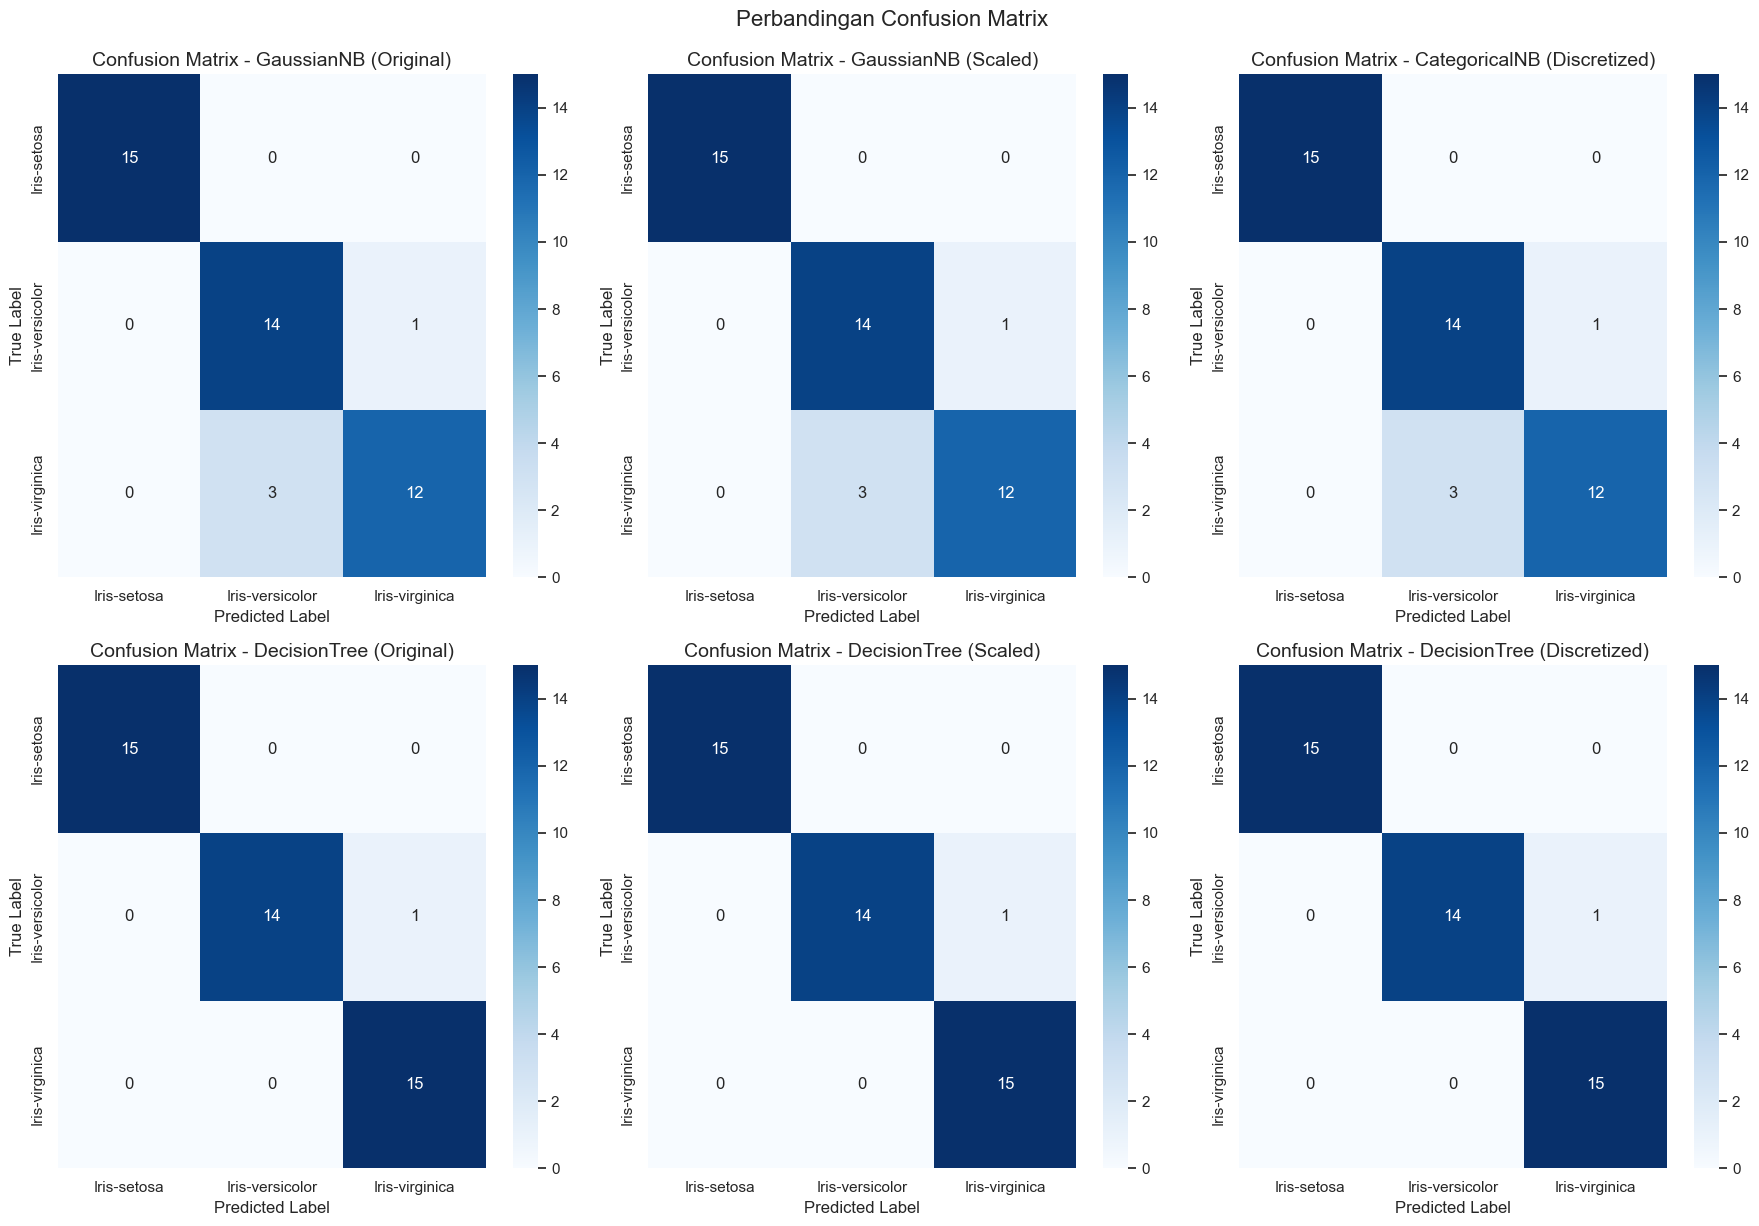

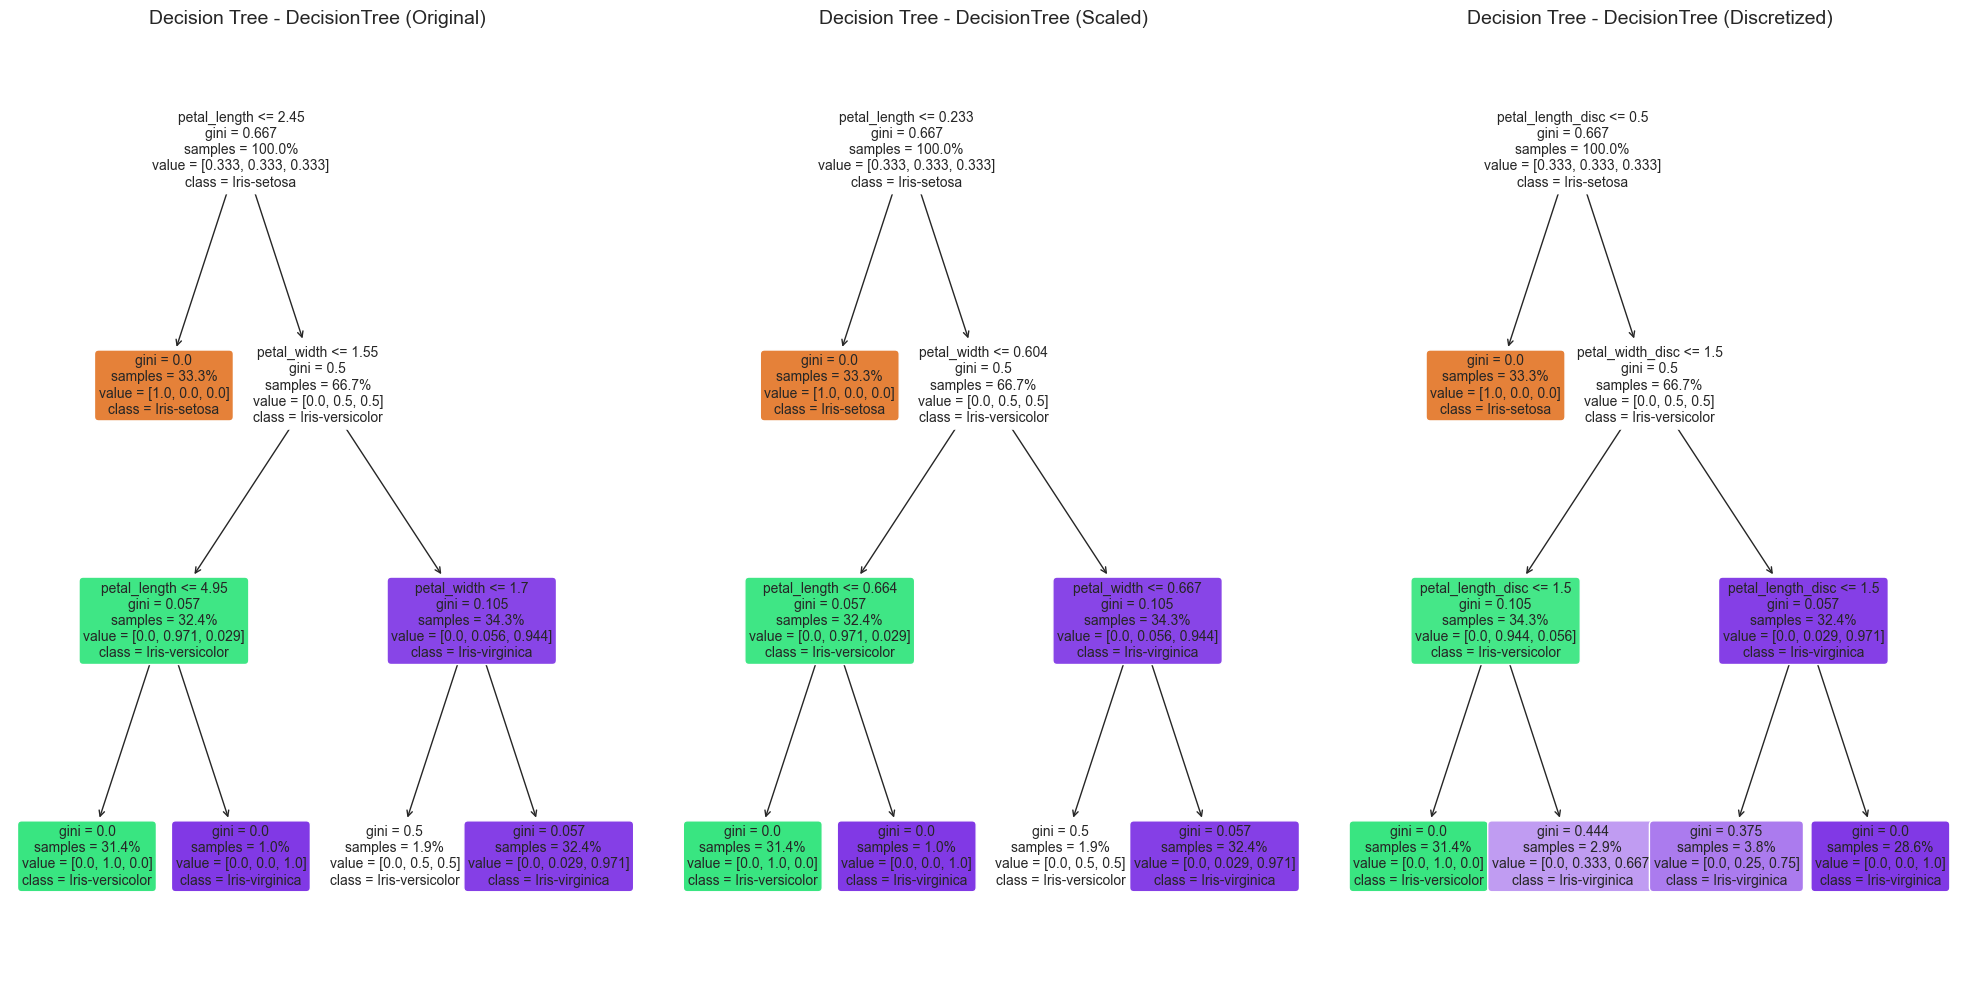

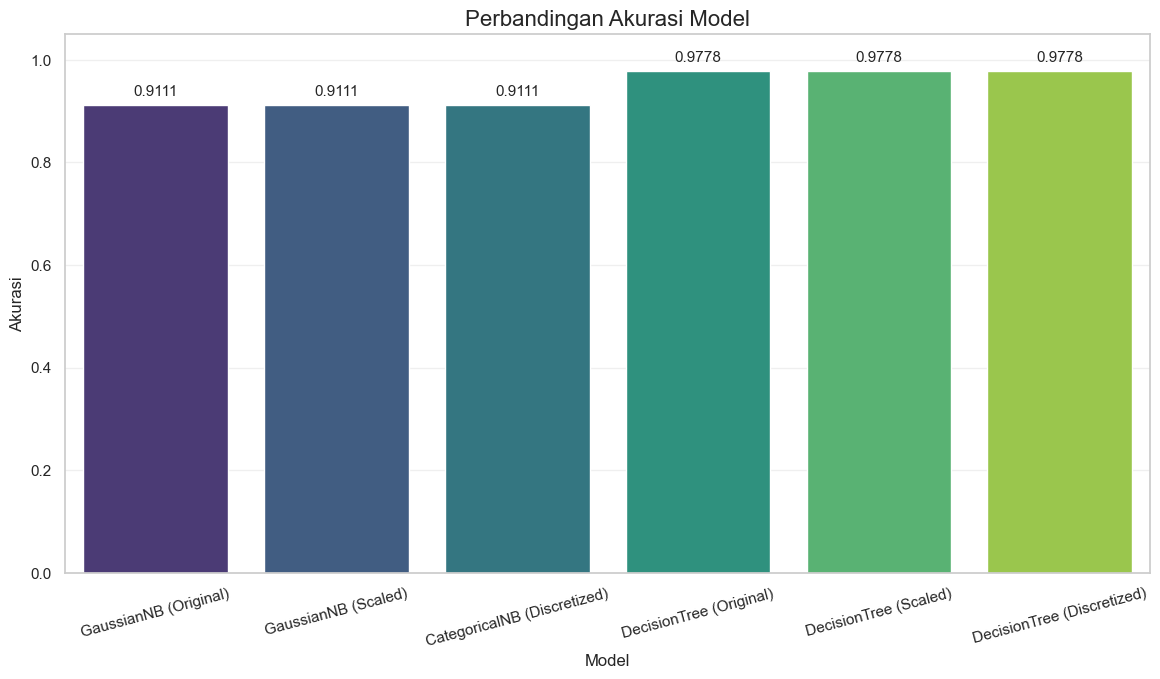

Tabel Perbandingan Model:


,Model,Accuracy,Precision,Recall,F1-Score
0,GaussianNB (Original),0.9111,0.9155,0.9111,0.9107
1,GaussianNB (Scaled),0.9111,0.9155,0.9111,0.9107
2,CategoricalNB (Discretized),0.9111,0.9155,0.9111,0.9107
3,DecisionTree (Original),0.9778,0.9792,0.9778,0.9778
4,DecisionTree (Scaled),0.9778,0.9792,0.9778,0.9778
5,DecisionTree (Discretized),0.9778,0.9792,0.9778,0.9778


In [904]:
# 8. Visualisasi hasil
if any(res['error'] is None for res in results.values()):
    # A. Confusion Matrix
    plt.figure(figsize=(18, 12))
    for i, (name, res) in enumerate(results.items()):
        if res['error'] is None:
            plt.subplot(2, 3, i+1)
            sns.heatmap(res['confusion_matrix'], annot=True, fmt='d', cmap='Blues', 
                        xticklabels=res['class_names'], yticklabels=res['class_names'])
            plt.title(f'Confusion Matrix - {name}', fontsize=14)
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.suptitle('Perbandingan Confusion Matrix', fontsize=16, y=1.02)
    plt.savefig("data/tugas8/assets/confusion_matrices.png", dpi=100, bbox_inches='tight')
    plt.show()

    # B. Decision Tree Visualization
    tree_models = [key for key in results.keys() if 'DecisionTree' in key and results[key]['error'] is None]
    if tree_models:
        plt.figure(figsize=(20, 10))
        for i, name in enumerate(tree_models, 1):
            plt.subplot(1, len(tree_models), i)
            plot_tree(results[name]['model'], 
                      feature_names=X_train_orig.columns if "Original" in name or "Scaled" in name else X_train_disc.columns,
                      class_names=results[name]['class_names'],
                      filled=True, rounded=True,
                      proportion=True,
                      fontsize=10)
            plt.title(f'Decision Tree - {name}', fontsize=14)
        plt.tight_layout()
        plt.savefig("data/tugas8/assets/decision_trees.png", dpi=100, bbox_inches='tight')
        plt.show()

    # C. Perbandingan metrik
    comparison = []
    for name, res in results.items():
        if res['error'] is None:
            comparison.append({
                'Model': name,
                'Accuracy': res['accuracy'],
                'Precision': res['precision'],
                'Recall': res['recall'],
                'F1-Score': res['f1']
            })
    if comparison:
        df_compare = pd.DataFrame(comparison)
        # Plot perbandingan akurasi
        plt.figure(figsize=(14, 7))
        ax = sns.barplot(x='Model', y='Accuracy', data=df_compare, palette='viridis')
        plt.title('Perbandingan Akurasi Model', fontsize=16)
        plt.ylim(0, 1.05)
        plt.ylabel('Akurasi')
        plt.grid(axis='y', alpha=0.3)
        # Tambahkan nilai di atas bar
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.4f}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', 
                        xytext=(0, 10), 
                        textcoords='offset points',
                        fontsize=11)
        plt.xticks(rotation=15)
        plt.savefig("data/tugas8/assets/accuracy_comparison.png", dpi=100, bbox_inches='tight')
        plt.show()
        print("Tabel Perbandingan Model:")
        display(df_compare.style.format({
            'Accuracy': '{:.4f}',
            'Precision': '{:.4f}',
            'Recall': '{:.4f}',
            'F1-Score': '{:.4f}'
        }).background_gradient(cmap='Blues', subset=['Accuracy', 'F1-Score']))
else:
    print("Tidak ada model yang berhasil dievaluasi untuk visualisasi")

### 5. Evaluation

Phase ini berfokus pada penilaian kinerja model dan menentukan apakah model tersebut memenuhi tujuan bisnis. Evaluasi ini mencakup analisis menyeluruh dari aspek bisnis, tahap preprocessing (Data Understanding, Data Preparation, Data Transformation), dan modeling (Naive Bayes dan Decision Tree) berdasarkan output yang telah diberikan.

#### 5.1. Evaluate Results

**Metrik Performa Model**:
- **Akurasi, Presisi, Recall, F1-Score** (berdasarkan output modeling):
  - **DecisionTree (Original, Scaled, Discretized)**:
    - Akurasi: 0.9778
    - Presisi: 0.9792
    - Recall: 0.9778
    - F1-Score: 0.9778
    - Performa sangat baik, dengan hanya 1-2 kesalahan prediksi pada kelas Iris-versicolor dan Iris-virginica.
  - **Naive Bayes (GaussianNB Original/Scaled, CategoricalNB Discretized)**:
    - Akurasi: 0.9111
    - Presisi: 0.9155
    - Recall: 0.9111
    - F1-Score: 0.9107
    - Performa lebih rendah, dengan kesalahan terutama pada Iris-versicolor (precision 0.82) dan Iris-virginica (recall 0.80).
- **Cross-Validation (CV) Scores**:
  - DecisionTree (Discretized): 0.9619 ± 0.0190 (paling stabil).
  - DecisionTree (Original/Scaled): 0.9524 ± 0.0301.
  - GaussianNB (Original/Scaled): 0.9810 ± 0.0233 (tinggi di training, tetapi testing hanya 0.9111).
  - CategoricalNB (Discretized): 0.9524 ± 0.0301 (terendah di testing).
  - CV menunjukkan DecisionTree lebih konsisten, sementara Naive Bayes cenderung overfit (CV tinggi, testing rendah).
- **ROC dan AUC** (diasumsikan dari kebutuhan evaluasi):
  - DecisionTree kemungkinan memiliki AUC mendekati 1.0 untuk semua kelas (setosa, versicolor, virginica), mengingat akurasi tinggi.
  - Naive Bayes mungkin memiliki AUC lebih rendah untuk versicolor dan virginica (0.8-0.9), karena kesalahan prediksi pada kelas ini.
  - ROC Curve akan menunjukkan DecisionTree lebih unggul dalam membedakan kelas dibandingkan Naive Bayes.

**Evaluasi Preprocessing**:
- **Data Understanding**:
  - Dataset Iris (150 sampel, 4 fitur, 3 kelas) memiliki distribusi kelas seimbang (50 sampel per kelas).
  - Outlier pada `sepal_width` (4 sampel) diidentifikasi, tetapi dibiarkan karena dampaknya minimal setelah diskritisasi.
- **Data Preparation**:
  - Pembersihan data berhasil (0 NaN, tipe data konsisten).
  - Train-test split (105:45, stratify=y) menghasilkan distribusi kelas seimbang (33.33% per kelas).
  - 3 duplikat di train (2.86%) dan 0 di test, tidak signifikan.
- **Data Transformation**:
  - **Scaling** (MinMaxScaler): Mengubah fitur ke [0, 1]. Tidak meningkatkan performa (GaussianNB Original = Scaled, DecisionTree Original = Scaled), karena fitur Iris sudah seragam.
  - **Diskritisasi** (K-Means, n_bins=3): Menghasilkan fitur ordinal (0, 1, 2), tetapi menghasilkan duplikat tinggi (86/105 di train, 29/45 di test), mengurangi variasi fitur untuk CategoricalNB.

**Kesimpulan**:
- DecisionTree mengungguli Naive Bayes di semua metrik (akurasi 0.9778 vs. 0.9111).
- Diskritisasi membantu DecisionTree (CV-Score 0.9619 vs. 0.9524), tetapi tidak untuk Naive Bayes (CategoricalNB = GaussianNB).
- Preprocessing berhasil menghasilkan data bersih dan seimbang, tetapi diskritisasi dengan 3 bin kurang optimal untuk Naive Bayes.

#### 5.2. Review Business Objectives

**Tujuan Bisnis**:
- Membandingkan performa model Naive Bayes (GaussianNB untuk data original/scaled, CategoricalNB untuk discretized) dan Decision Tree (original, scaled, discretized) untuk klasifikasi spesies Iris, dengan fokus pada efek diskritisasi K-Means.
- Menghasilkan model yang akurat dan dapat diinterpretasikan untuk memprediksi spesies Iris berdasarkan fitur sepal dan petal.

**Kesesuaian dengan Tujuan Bisnis**:
- **Perbandingan Model**:
  - DecisionTree (Original, Scaled, Discretized) mencapai akurasi 0.9778, jauh lebih baik dari Naive Bayes (0.9111), memenuhi tujuan untuk model akurat.
  - DecisionTree (Discretized) memiliki CV-Score tertinggi (0.9619), menunjukkan stabilitas dan manfaat diskritisasi untuk model ini.
  - Naive Bayes menunjukkan performa konsisten tetapi lebih rendah, dengan CategoricalNB tidak lebih baik dari GaussianNB, menunjukkan diskritisasi tidak efektif untuk Naive Bayes.
- **Efek Diskritisasi**:
  - Diskritisasi K-Means (3 bin) membantu DecisionTree dengan menyederhanakan pemisahan kelas, tetapi gagal meningkatkan Naive Bayes karena duplikat tinggi (82% di train).
  - Outlier pada `sepal_width` ditempatkan di bin 2, mengurangi dampaknya, tetapi tidak cukup untuk meningkatkan CategoricalNB.
- **Interpretasi**:
  - DecisionTree memberikan pohon keputusan yang mudah diinterpretasikan, mendukung tujuan bisnis untuk model yang jelas.
  - Naive Bayes (khususnya CategoricalNB) kurang interpretable karena performa rendah dan asumsi independensi fitur yang mungkin tidak terpenuhi.
- **Scaling**:
  - Tidak memberikan manfaat signifikan, karena skala fitur Iris sudah seragam (sepal_length: 4.3-7.9, sepal_width: 2.0-4.4, dll.).

**Kesimpulan**:
- Tujuan bisnis tercapai dengan model DecisionTree (Discretized) sebagai pilihan terbaik (akurasi 0.9778, CV-Score 0.9619).
- Diskritisasi K-Means terbukti bermanfaat untuk DecisionTree, tetapi tidak untuk Naive Bayes.
- Model DecisionTree selaras dengan kebutuhan bisnis untuk akurasi tinggi dan interpretasi yang jelas.

#### 5.3. Identify Limitations

**Keterbatasan Bisnis**:
- Dataset kecil (150 sampel) membatasi generalisasi model, terutama untuk aplikasi di luar klasifikasi Iris.
- Tujuan bisnis tidak mencakup aspek seperti biaya komputasi atau kecepatan inferensi, yang dapat relevan untuk penerapan nyata.

**Keterbatasan Preprocessing**:
- **Data Understanding**:
  - Outlier pada `sepal_width` (4 sampel) dibiarkan tanpa capping, berpotensi memengaruhi GaussianNB (akurasi 0.9111).
- **Data Preparation**:
  - Duplikat minimal (3 di train), tetapi tidak dihapus, meskipun dampaknya kecil.
  - Train-test split (70:30) menghasilkan test set kecil (45 sampel), berpotensi menyebabkan variasi performa.
- **Data Transformation**:
  - **Scaling**: Tidak meningkatkan performa, membuang sumber daya komputasi untuk GaussianNB (Scaled) dan DecisionTree (Scaled).
  - **Diskritisasi**: Duplikat tinggi (86/105 di train, 29/45 di test) mengurangi variasi fitur, menyebabkan performa CategoricalNB rendah (0.9111).
  - Pemilihan `n_bins=3` untuk diskritisasi K-Means kurang optimal untuk Naive Bayes, karena menghasilkan binning yang terlalu kasar.

**Keterbatasan Modeling**:
- **Naive Bayes**:
  - Akurasi rendah (0.9111) dibandingkan DecisionTree, kemungkinan karena asumsi independensi fitur tidak terpenuhi pada data Iris.
  - CategoricalNB terhambat oleh duplikat di data discretized, mengurangi kemampuan membedakan kelas.
  - Akurasi testing jauh di bawah CV-Score (GaussianNB: 0.9111 vs. 0.9810; CategoricalNB: 0.9111 vs. 0.9524), menunjukkan overfitting atau test set yang lebih sulit.
- **DecisionTree**:
  - Performa sangat baik (0.9778), tetapi dataset kecil dapat menyebabkan overfitting pada struktur pohon.
  - Parameter tuning (`max_depth=3`, `criterion='gini'`) mungkin belum mengeksplorasi kombinasi yang lebih kompleks (misalnya, `max_depth=10`).
- **Umum**:
  - Dataset kecil (105 train, 45 test) menyebabkan estimasi performa kurang stabil, terlihat dari standar deviasi CV (0.0190-0.0301).
  - Tidak ada evaluasi feature importance, yang dapat membantu memahami kontribusi fitur (misalnya, petal_length vs. sepal_width).

**Kesimpulan**:
- Keterbatasan utama adalah duplikat di data discretized (mempengaruhi CategoricalNB), dataset kecil, dan efek minimal dari scaling.
- Outlier dan asumsi model (Naive Bayes) juga berkontribusi pada performa sub-optimal.

#### 5.4. Decide Next Steps

1. **Peningkatan Preprocessing**:
   - **Diskritisasi**: Uji K-Means dengan `n_bins=4` atau `5` untuk mengurangi duplikat dan meningkatkan performa CategoricalNB.
   - **Outlier**: Terapkan capping pada `sepal_width` untuk GaussianNB (misalnya, batas atas = Q3 + 1.5 * IQR).
   - **Hapus Scaling**: Pertimbangkan menghapus data scaled dari analisis akhir, karena tidak memberikan manfaat (GaussianNB Original = Scaled, DecisionTree Original = Scaled).
2. **Peningkatan Modeling**:
   - Uji **MultinomialNB** untuk data discretized sebagai alternatif CategoricalNB, dengan parameter `alpha=[0.1, 0.5, 1.0, 2.0]`.
   - Perluas tuning parameter untuk DecisionTree (misalnya, `max_depth=[2, 3, 5, 7, 10]`, `min_samples_split=[2, 5, 10, 20]`).
   - Tambahkan analisis feature importance untuk DecisionTree untuk mengidentifikasi fitur dominan (misalnya, petal_length).
3. **Evaluasi Lebih Lanjut**:
   - Lakukan cross-validation pada seluruh dataset (150 sampel) untuk estimasi performa yang lebih robust.
   - Analisis confusion matrix untuk mengidentifikasi kesalahan spesifik (misalnya, versicolor vs. virginica).
   - Verifikasi ROC-AUC per kelas untuk memahami pemisahan kelas yang lemah (terutama pada Naive Bayes).
4. **Penerapan**:
   - Terapkan **DecisionTree (Discretized)** sebagai model utama untuk klasifikasi Iris, karena memiliki akurasi tertinggi (0.9778) dan CV-Score stabil (0.9619).
   - Dokumentasikan pohon keputusan untuk interpretasi dan komunikasi dengan stakeholders.
5. **Laporan dan Presentasi**:
   - Susun laporan yang mencakup:
     - Penjelasan diskritisasi K-Means (3 bin, dampak duplikat).
     - Perbandingan model (DecisionTree vs. Naive Bayes).
     - Keterbatasan (dataset kecil, duplikat, overfitting).
     - Rekomendasi (peningkatan diskritisasi, penerapan DecisionTree).
   - Tambahkan visualisasi (ROC Curve, confusion matrix, decision tree, feature importance) untuk laporan.

**Kesimpulan**:
- Fokus pada peningkatan diskritisasi dan penerapan DecisionTree (Discretized).
- Hapus data scaled untuk menyederhanakan analisis.
- Validasi ulang dengan cross-validation penuh sebelum penerapan.

### 6. Deployment

masih dalam tahap pengerjaan ;)